In [46]:
import pandas as pd
from pprint import pprint
from bs4 import BeautifulSoup
import io

pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns',None) #display all columns
pd.set_option('display.max_rows',None) #display all rows

# Required Input files
# When running for the very first time, `ipl2025_results.csv`` file is required with all the team managers and an initial row of 0s.
# IPL2025MockAuctionSummary.csv file is required with each of the managers, their teams and their players listed.

# Dependencies to install
#  pip3 install beautifulsoup4
#  pip3 install lxml ??? (Double check if required)
#  pip3 install html5lib ??? (Double check if required)
#  pip3 install pywhatkit
#  pip3 install matplotlib
#  pip3 install selenium
#  pip3 install tabulate
#  pip3 install thefuzz

In [ ]:
# Backup the input and output files for each day for posterity

# Change for each day
day_num = 5
day = 'day_' + str(day_num)
prev_day = 'day_' + str(day_num - 1)

# Change for each group
group = 'group_2'

results_file = f'./{group}/ipl2025_results_{day}.csv'
prev_results_file = f'./{group}/ipl2025_results_{prev_day}.csv'

ipl_mock_auction_summary = f'./{group}/IPL2025MockAuctionSummary.csv'

In [48]:
mvp_df = pd.read_csv(f'./data/mvp_{day}.csv')
mvp_df

,POS,Player,Pts,Mat,Wkts,Dots,4s,6s,Catches,Run outs,Stumpings,Team
0,1,ishan kishan,51.0,1,0,0,11,6,1,0.0,0,SRH
1,2,quinton de kock,46.0,2,0,0,9,6,1,0.0,0,KKR
2,3,dhruv jurel,46.0,2,0,0,10,6,0,0.0,0,RR
3,4,nicholas pooran,44.5,1,0,0,6,7,2,0.0,0,LSG
4,5,shreyas iyer,44.0,1,0,0,5,9,0,0.0,0,PBKS
5,6,ajinkya rahane,37.5,2,0,0,7,5,1,0.0,0,KKR
6,7,sanju samson,36.5,1,0,0,9,4,0,0.0,0,RR
7,8,mitchell marsh,36.0,1,0,0,6,6,0,0.0,0,LSG
8,9,b. sai sudharsan,36.0,1,0,0,5,6,1,0.0,0,GT
9,10,travis head,33.0,1,0,0,9,3,0,0.0,0,SRH


In [49]:
fantasy_teams_auction_df = pd.read_csv(ipl_mock_auction_summary)
fantasy_teams_auction_df

,Shashaank,Naren,Sriram,Mahaarajan,Srikumar,Sudarshan,Niranjini,Raghav,Priyanka
0,Punjab Kings,Gujarat Titans,Delhi Capitals,Royal Challengers Bengaluru,Rajasthan Royals,Chennai Super Kings,Sunrisers Hyderabad,Mumbai Indians,Kolkata Knight Riders
1,Glenn Maxwell,Shubman Gill,KL Rahul,Virat Kohli,Yashasvi Jaiswal,Matheesha Pathirana,Travis Head,N Tilak Varma,Venkatesh Iyer
2,Marcus Stoinis,Aiden Markram,Mitchell Starc,Arshdeep Singh,Nitish Rana,Ruturaj Gaikwad,Abhishek Sharma,Suryakumar Yadav,Sunil Narine
3,Shreyas Iyer,Quinton de Kock,Axar Patel,Washington Sundar,Deepak Chahar,Noor Ahmad,Heinrich Klaasen,Trent Boult,Andre Russell
4,Rahul Tripathi,Lockie Ferguson,Mohammed Siraj,Hardik Pandya,Maheesh Theekshana,Abhinav Manohar,Mukesh Kumar,Khaleel Ahmed,T Natarajan
5,Vaibhav Arora,Abdul Samad,Rinku Singh,Mohsin Khan,Rohit Sharma,Mohammed Shami,Harpreet Brar,Nicholas Pooran,Akash Deep
6,Mukesh Choudhary,Kuldeep Yadav,Will Jacks,Tim David,Jos Buttler,Deepak Hooda,Wanindu Hasaranga,Gerald Coetzee,Abishek Porel
7,Shahrukh Khan,Ravichandran Ashwin,Shashank Singh,Shamar Joseph,Devon Conway,Shahbaz Ahamad,Rahul Chahar,Krunal Pandya,Sherfane Rutherford
8,Robin Minz,Varun Chakaravarthy,Angkrish Raghuvanshi,Devdutt Padikkal,Tristan Stubbs,Pat Cummins,Jitesh Sharma,Nathan Ellis,Manish Pandey
9,Ishan Kishan,Liam Livingstone,Mohit Sharma,Rishabh Pant,Rachin Ravindra,MS Dhoni,Bhuvneshwar Kumar,B. Sai Sudharsan,Ajinkya Rahane


In [50]:
fantasy_mgrs = fantasy_teams_auction_df.columns
fantasy_mgrs.to_list()

['Shashaank',
 'Naren',
 'Sriram',
 'Mahaarajan',
 'Srikumar',
 'Sudarshan',
 'Niranjini',
 'Raghav',
 'Priyanka']

In [51]:
#Make new dataframe for manager_teams 
fantasy_mgr_teams = fantasy_teams_auction_df.iloc[:1]
fantasy_mgr_teams

,Shashaank,Naren,Sriram,Mahaarajan,Srikumar,Sudarshan,Niranjini,Raghav,Priyanka
0,Punjab Kings,Gujarat Titans,Delhi Capitals,Royal Challengers Bengaluru,Rajasthan Royals,Chennai Super Kings,Sunrisers Hyderabad,Mumbai Indians,Kolkata Knight Riders


In [52]:
import os
#Create new dataframe for manager_players
fantasy_teams_df = fantasy_teams_auction_df.iloc[1:]
fantasy_teams_df = fantasy_teams_df.apply(lambda x: x.astype(str).str.lower())

fantasy_teams_df_per_mgr = {}
for mgr in fantasy_teams_df.columns:
    mgr_file = f'./{group}/{mgr}.csv'
    if not os.path.exists(mgr_file):
        df = pd.DataFrame(fantasy_teams_df[mgr])
        df.to_csv(mgr_file, index=False)
    else:
        df = pd.read_csv(mgr_file)
    fantasy_teams_df_per_mgr[mgr] = df
fantasy_teams_df


,Shashaank,Naren,Sriram,Mahaarajan,Srikumar,Sudarshan,Niranjini,Raghav,Priyanka
1,glenn maxwell,shubman gill,kl rahul,virat kohli,yashasvi jaiswal,matheesha pathirana,travis head,n tilak varma,venkatesh iyer
2,marcus stoinis,aiden markram,mitchell starc,arshdeep singh,nitish rana,ruturaj gaikwad,abhishek sharma,suryakumar yadav,sunil narine
3,shreyas iyer,quinton de kock,axar patel,washington sundar,deepak chahar,noor ahmad,heinrich klaasen,trent boult,andre russell
4,rahul tripathi,lockie ferguson,mohammed siraj,hardik pandya,maheesh theekshana,abhinav manohar,mukesh kumar,khaleel ahmed,t natarajan
5,vaibhav arora,abdul samad,rinku singh,mohsin khan,rohit sharma,mohammed shami,harpreet brar,nicholas pooran,akash deep
6,mukesh choudhary,kuldeep yadav,will jacks,tim david,jos buttler,deepak hooda,wanindu hasaranga,gerald coetzee,abishek porel
7,shahrukh khan,ravichandran ashwin,shashank singh,shamar joseph,devon conway,shahbaz ahamad,rahul chahar,krunal pandya,sherfane rutherford
8,robin minz,varun chakaravarthy,angkrish raghuvanshi,devdutt padikkal,tristan stubbs,pat cummins,jitesh sharma,nathan ellis,manish pandey
9,ishan kishan,liam livingstone,mohit sharma,rishabh pant,rachin ravindra,ms dhoni,bhuvneshwar kumar,b. sai sudharsan,ajinkya rahane
10,jake fraser-mcgurk,harshit rana,kagiso rabada,rasikh dar,sandeep sharma,akash madhwal,yuzvendra chahal,fazalhaq farooqi,shimron hetmyer


In [53]:
from thefuzz import fuzz
from thefuzz import process
            
# Compute total score for each fantasy team based on MVP points of each player
scores = { fantasy_mgr:0 for fantasy_mgr in fantasy_mgrs.to_list() }
for mgr in fantasy_mgrs:
    print(mgr)
    mgr_df = fantasy_teams_df_per_mgr[mgr]
    mgr_day_pts = {}
    mgr_file = f'./{group}/{mgr}.csv'
    all_players_have_min_pts = True
    mvp_players_with_pts = mvp_df['Player'].to_list()
    for i in range(len(fantasy_teams_df[mgr])):
        player_name = str(fantasy_teams_df[mgr].iloc[i]).lower()
        if player_name in mvp_players_with_pts:
            player_score = float(mvp_df.loc[mvp_df['Player'] == fantasy_teams_df[mgr].iloc[i],'Pts'].iloc[0])
            scores[mgr] += player_score
            mgr_day_pts[player_name] = player_score
            print(f'\t{player_name} points found. Adding his score {player_score} to total. New score {scores[mgr]}')
        else:
            closest_match = process.extractOne(player_name, mvp_players_with_pts)
            mgr_day_pts[player_name] = 0.0
            print(f'\t{player_name} not found in mvp_table... Double check the spelling of player name, closest match is {closest_match}')
            all_players_have_min_pts = False
    mgr_df[f'{day}'] = mgr_df[mgr].map(mgr_day_pts)
    mgr_df = mgr_df.reindex(sorted(mgr_df.columns), axis=1)
    mgr_df.to_csv(mgr_file, index=False)
    print(f'*{day.upper()}*\n```\n{mgr_df.to_markdown(index=False)}\n```')
    if all_players_have_min_pts:
        print(f'All players have min fantasy points.')

Shashaank
	glenn maxwell points found. Adding his score 6.5 to total. New score 6.5
	marcus stoinis points found. Adding his score 12.5 to total. New score 19.0
	shreyas iyer points found. Adding his score 44.0 to total. New score 63.0
	rahul tripathi not found in mvp_table... Double check the spelling of player name, closest match is ('rahul tewatia', 74)
	vaibhav arora points found. Adding his score 23.5 to total. New score 86.5
	mukesh choudhary not found in mvp_table... Double check the spelling of player name, closest match is ('mukesh kumar', 71)
	shahrukh khan points found. Adding his score 3.5 to total. New score 90.0
	robin minz not found in mvp_table... Double check the spelling of player name, closest match is ('rinku singh', 57)
	ishan kishan points found. Adding his score 51.0 to total. New score 141.0
	jake fraser-mcgurk not found in mvp_table... Double check the spelling of player name, closest match is ('aniket verma', 54)
	jofra archer points found. Adding his score 17

In [54]:
scores

{'Shashaank': 170.0,
 'Naren': 206.0,
 'Sriram': 163.0,
 'Mahaarajan': 68.0,
 'Srikumar': 188.5,
 'Sudarshan': 97.5,
 'Niranjini': 113.0,
 'Raghav': 164.0,
 'Priyanka': 137.0}

In [55]:
ipl_team_pts_tbl = pd.read_csv(f'./data/standings_{day}.csv')
ipl_team_pts_tbl

,Teams,M,W,L,T,N/R,PT,NRR,Series Form,Next,For,Against
0,Sunrisers Hyderabad,1,1,0,0,0,2,2.200,W,"vs LSG, DC, KKR",286/20.0,242/20.0
1,Royal Challengers Bengaluru,1,1,0,0,0,2,2.137,W,"vs CSK, GT, MI",177/16.2,174/20.0
2,Punjab Kings,1,1,0,0,0,2,0.550,W,"vs LSG, RR, CSK",243/20.0,232/20.0
3,Chennai Super Kings,1,1,0,0,0,2,0.493,W,"vs RCB, RR, DC",158/19.1,155/20.0
4,Delhi Capitals,1,1,0,0,0,2,0.371,W,"vs SRH, CSK, RCB",211/19.3,209/20.0
5,Kolkata Knight Riders,2,1,1,0,0,2,-0.308,LW,"vs MI, SRH, LSG",327/37.3,328/36.2
6,Lucknow Super Giants,1,0,1,0,0,0,-0.371,L,"vs SRH, PBKS, MI",209/20.0,211/19.3
7,Mumbai Indians,1,0,1,0,0,0,-0.493,L,"vs GT, KKR, LSG",155/20.0,158/19.1
8,Gujarat Titans,1,0,1,0,0,0,-0.550,L,"vs MI, RCB, SRH",232/20.0,243/20.0
9,Rajasthan Royals,2,0,2,0,0,0,-1.882,LL,"vs CSK, PBKS, GT",393/40.0,439/37.3


In [56]:
for mgr in fantasy_teams_df.columns:
    no_of_wins = 0
    if fantasy_mgr_teams[mgr].item() in ipl_team_pts_tbl.Teams.to_list():
        no_of_wins = ipl_team_pts_tbl.loc[ipl_team_pts_tbl['Teams'] == fantasy_mgr_teams[mgr].item(),'W'].item()
        if no_of_wins == '-':
            no_of_wins=0
        scores[mgr] += (float(no_of_wins)*50)
        print(f'{str(mgr)}\t{str(fantasy_mgr_teams[mgr].values)}\t{str(no_of_wins)}')

Shashaank	['Punjab Kings']	1
Naren	['Gujarat Titans']	0
Sriram	['Delhi Capitals']	1
Mahaarajan	['Royal Challengers Bengaluru']	1
Srikumar	['Rajasthan Royals']	0
Sudarshan	['Chennai Super Kings']	1
Niranjini	['Sunrisers Hyderabad']	1
Raghav	['Mumbai Indians']	0
Priyanka	['Kolkata Knight Riders']	1


In [57]:
prev_scores = pd.read_csv(prev_results_file)
prev_scores_dicts = prev_scores.to_dict(orient='records')
prev_scores_dicts

[{'Shashaank': 0.0,
  'Naren': 0.0,
  'Sriram': 0.0,
  'Mahaarajan': 0.0,
  'Srikumar': 0.0,
  'Sudarshan': 0.0,
  'Niranjini': 0.0,
  'Raghav': 0.0,
  'Priyanka': 0.0},
 {'Shashaank': 7.5,
  'Naren': 30.0,
  'Sriram': 34.5,
  'Mahaarajan': 88.0,
  'Srikumar': 0.0,
  'Sudarshan': 0.0,
  'Niranjini': 26.0,
  'Raghav': 18.5,
  'Priyanka': 65.5},
 {'Shashaank': 62.0,
  'Naren': 71.0,
  'Sriram': 61.0,
  'Mahaarajan': 88.0,
  'Srikumar': 108.0,
  'Sudarshan': 132.0,
  'Niranjini': 146.0,
  'Raghav': 83.5,
  'Priyanka': 84.5},
 {'Shashaank': 62.0,
  'Naren': 101.5,
  'Sriram': 159.5,
  'Mahaarajan': 94.5,
  'Srikumar': 127.0,
  'Sudarshan': 147.5,
  'Niranjini': 153.5,
  'Raghav': 128.0,
  'Priyanka': 103.0},
 {'Shashaank': 190.0,
  'Naren': 117.0,
  'Sriram': 205.5,
  'Mahaarajan': 118.0,
  'Srikumar': 147.5,
  'Sudarshan': 147.5,
  'Niranjini': 157.5,
  'Raghav': 164.0,
  'Priyanka': 123.5}]

In [58]:
current_scores_dict = prev_scores_dicts + [scores]

In [59]:
graph_scores = pd.DataFrame(current_scores_dict)
graph_scores

,Shashaank,Naren,Sriram,Mahaarajan,Srikumar,Sudarshan,Niranjini,Raghav,Priyanka
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.5,30.0,34.5,88.0,0.0,0.0,26.0,18.5,65.5
2,62.0,71.0,61.0,88.0,108.0,132.0,146.0,83.5,84.5
3,62.0,101.5,159.5,94.5,127.0,147.5,153.5,128.0,103.0
4,190.0,117.0,205.5,118.0,147.5,147.5,157.5,164.0,123.5
5,220.0,206.0,213.0,118.0,188.5,147.5,163.0,164.0,187.0


In [60]:
graph_scores.to_csv(results_file, index=False)

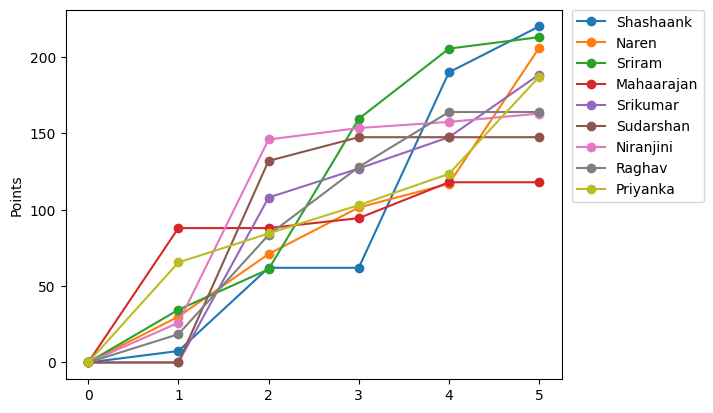

In [61]:
import matplotlib.pyplot as plt
ax = graph_scores.plot.line(marker='o')
#ax.set_xlabel("Days")
ax.set_ylabel("Points")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [62]:
scores_sorted = {k: v for k, v in sorted(scores.items(), key=lambda item: item[1], reverse=True)}
score_msg = str(scores_sorted)

scores_msg_df = pd.DataFrame(
    scores_sorted.items(),
    columns=['Manager', 'Points']
)
print(f'*{day.upper()}*\n```\n{scores_msg_df.to_markdown(index=False)}\n```')

*DAY_5*
```
| Manager    |   Points |
|:-----------|---------:|
| Shashaank  |    220   |
| Sriram     |    213   |
| Naren      |    206   |
| Srikumar   |    188.5 |
| Priyanka   |    187   |
| Raghav     |    164   |
| Niranjini  |    163   |
| Sudarshan  |    147.5 |
| Mahaarajan |    118   |
```
